In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define chunk size (e.g., 100,000 rows at a time)
chunk_size = 100000

# Columns to load, excluding 'Category' because it will be added later
cols_to_load = ['Product', 'Consumer complaint narrative']

# Define column data types for memory optimization
dtype = {
    'Product': 'category',
    'Consumer complaint narrative': 'str'
}

# List to store processed chunks
df_list = []

# Read CSV in chunks
chunks = pd.read_csv(r"D:\Kaiburr\Task5\complaints.csv", dtype=dtype, usecols=cols_to_load, chunksize=chunk_size)

# Process each chunk
for chunk in chunks:
    # Drop rows with NaN values in 'Consumer complaint narrative'
    chunk = chunk.dropna(subset=['Consumer complaint narrative'])
    
    # Apply category mapping to 'Product' column
    category_map = {
        'Credit reporting, repair, or other': 0,
        'Debt collection': 1,
        'Consumer Loan': 2,
        'Mortgage': 3
    }
    chunk['Category'] = chunk['Product'].map(category_map)
    
    # Drop rows where the 'Category' is NaN after mapping
    chunk = chunk.dropna(subset=['Category'])
    
    # Append the processed chunk to the list
    df_list.append(chunk)

# Combine all processed chunks into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

# Quick overview of the data
print(df.head())
print(df.info())
print(df['Product'].value_counts())  # Distribution of complaint types

# Extract features (X) and target (y)
X = df['Consumer complaint narrative']
y = df['Category']

# Preprocessing: Text cleaning
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = str(text).lower()  # Lowercase
    text = ''.join([c for c in text if c not in string.punctuation])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing to the dataset
X_processed = X.apply(preprocess)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_features = vectorizer.fit_transform(X_processed)

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# Sample prediction
sample_text = ["I am unable to pay my mortgage and want assistance."]
sample_processed = vectorizer.transform([preprocess(sample_text[0])])
predicted_category = lr.predict(sample_processed)
print("Predicted Category:", predicted_category[0])


           Product                       Consumer complaint narrative  \
0  Debt collection  RE : Attentively review my formal writ compose...   
1  Debt collection  This complaint is against S & S Recovery , Inc...   
2  Debt collection  It stated that I owe a balance of {$720.00}. I...   
3  Debt collection  I hired XXXX XXXX XXXX to negotiate with my cr...   
4  Debt collection  SPS Select Portfolio Servicing of XXXX XXXX XX...   

   Category  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515927 entries, 0 to 515926
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Product                       515927 non-null  object 
 1   Consumer complaint narrative  515927 non-null  object 
 2   Category                      515927 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.8+ MB
None
Product
D

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Logistic Regression Report:
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98     74510
         2.0       0.79      0.52      0.62      1933
         3.0       0.96      0.96      0.96     26743

    accuracy                           0.97    103186
   macro avg       0.91      0.82      0.85    103186
weighted avg       0.97      0.97      0.97    103186

Random Forest Report:
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98     74510
         2.0       0.92      0.10      0.19      1933
         3.0       0.94      0.96      0.95     26743

    accuracy                           0.96    103186
   macro avg       0.94      0.68      0.71    103186
weighted avg       0.96      0.96      0.96    103186

Predicted Category: 3.0



🔹 Logistic Regression Evaluation:
Accuracy: 96.96%


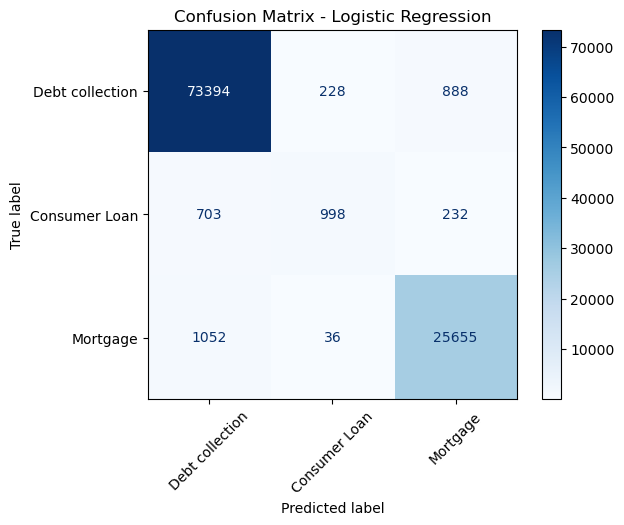


🔹 Random Forest Evaluation:
Accuracy: 96.39%


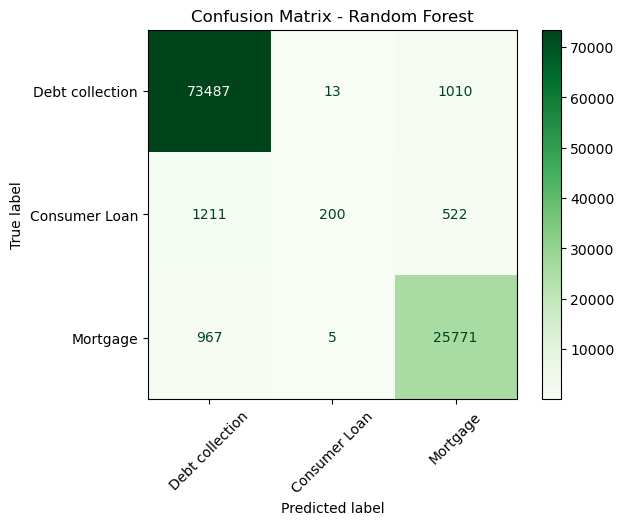


Sample comparison (Actual vs Predicted):
        Actual_Category  Predicted_Category_LR  Predicted_Category_RF
3853                1.0                    1.0                    1.0
197701              2.0                    2.0                    1.0
205078              1.0                    1.0                    1.0
121329              1.0                    1.0                    1.0
305351              1.0                    1.0                    1.0
82420               3.0                    3.0                    3.0
116415              3.0                    3.0                    3.0
449150              1.0                    1.0                    1.0
304312              3.0                    3.0                    3.0
256668              3.0                    3.0                    3.0

Sample Prediction Meaning:
Text: I am unable to pay my mortgage and want assistance.
Predicted Category Code: 3.0
Predicted Category Label: Mortgage
Actual Category Code: 3
Actual Categor

In [6]:
# ==============================
# 📊 Additional Evaluation
# ==============================
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------
# 🧠 Category Decoder
# ------------------------------
category_decoder = {
    0: 'Credit reporting, repair, or other',
    1: 'Debt collection',
    2: 'Consumer Loan',
    3: 'Mortgage'
}

# Get unique classes in test set (ensures labels match)
classes_in_test = sorted(y_test.unique())

# ==============================
# ✅ Logistic Regression Metrics
# ==============================
print("\n🔹 Logistic Regression Evaluation:")
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {acc_lr*100:.2f}%")

cm_lr = confusion_matrix(y_test, y_pred_lr, labels=classes_in_test)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                                 display_labels=[category_decoder[c] for c in classes_in_test])
disp_lr.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ==============================
# ✅ Random Forest Metrics
# ==============================
print("\n🔹 Random Forest Evaluation:")
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {acc_rf*100:.2f}%")

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=classes_in_test)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                                 display_labels=[category_decoder[c] for c in classes_in_test])
disp_rf.plot(cmap='Greens', xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ==============================
# 🧾 Combine Predictions and Ground Truth
# ==============================
results_df = pd.DataFrame({
    'Actual_Category': y_test,
    'Predicted_Category_LR': y_pred_lr,
    'Predicted_Category_RF': y_pred_rf
})

print("\nSample comparison (Actual vs Predicted):")
print(results_df.sample(10, random_state=42))

# ==============================
# 🧠 Sample Prediction Meaning
# ==============================
sample_text = ["I am unable to pay my mortgage and want assistance."]

# Preprocess and transform
sample_processed = vectorizer.transform([preprocess(sample_text[0])])

# Predict category using Logistic Regression
predicted_category = lr.predict(sample_processed)[0]

# Provide actual category (ground truth) manually
# Here, since the text mentions "mortgage", the actual category is 3
actual_category = 3

print("\nSample Prediction Meaning:")
print("Text:", sample_text[0])
print("Predicted Category Code:", predicted_category)
print("Predicted Category Label:", category_decoder[predicted_category])
print("Actual Category Code:", actual_category)
print("Actual Category Label:", category_decoder[actual_category])
